# Exploring Historic Wildfire Data

This notebook explores historic wildfire data from 1878-2019

Data can be downloaded here: [Historic Wildfires](https://www.sciencebase.gov/catalog/item/5ee13de982ce3bd58d7be7e7)



In [2]:
# Load desired packages

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import fiona

# change default figsize
plt.rcParams['figure.figsize'] = (15, 12)

In [3]:
# Load wildfire dataset
fires = gpd.read_file('../rawData/Shapefile/US_Wildfires_1878_2019.shp')

In [4]:
# Inspect data
fires.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 65845 entries, 0 to 65844
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FireName    65845 non-null  object  
 1   FireCode    65845 non-null  object  
 2   FireYear    65845 non-null  int64   
 3   IgntDate    34099 non-null  object  
 4   ContrlDate  23108 non-null  object  
 5   ContnDate   7196 non-null   object  
 6   Acres       65845 non-null  float64 
 7   Hectares    65845 non-null  float64 
 8   DataSrc     65845 non-null  object  
 9   DataNotes   65845 non-null  object  
 10  FireCause   65845 non-null  object  
 11  FoundIn     65845 non-null  object  
 12  FndNames    65845 non-null  object  
 13  FndCodes    65845 non-null  object  
 14  FndDates    65845 non-null  object  
 15  FireQual    65845 non-null  int64   
 16  Shape_Leng  65845 non-null  float64 
 17  Shape_Area  65845 non-null  float64 
 18  geometry    65845 non-null  geometry
d

In [145]:
# View data as a table
fires

,FireName,FireCode,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,DataSrc,DataNotes,FireCause,FoundIn,FndNames,FndCodes,FndDates,FireQual,Shape_Leng,Shape_Area,geometry
0,414008,AK6535415457219840611,1984,1984-06-11,None,None,3169.156439,1282.513243,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414008,Alternate Fire Codes: AK6535415457219840611,"Alternate Ignition, Controlled, and Contained ...",1,22876.846278,1.282513e+07,"POLYGON ((-154.61761 65.37700, -154.61268 65.3..."
1,414012,AK6621715235619840618,1984,1984-06-18,None,None,1964.386646,794.959774,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414012,Alternate Fire Codes: AK6621715235619840618,"Alternate Ignition, Controlled, and Contained ...",1,17290.576444,7.949598e+06,"POLYGON ((-152.35902 66.23226, -152.34487 66.2..."
2,414057,AK6495716269319840702,1984,1984-07-02,None,None,1688.849283,683.453661,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414057,Alternate Fire Codes: AK6495716269319840702,"Alternate Ignition, Controlled, and Contained ...",1,11226.497241,6.834537e+06,"POLYGON ((-162.68840 64.96873, -162.68733 64.9..."
3,414060,AK6379515502919840623,1984,1984-06-23,None,None,1399.226822,566.247506,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414060,Alternate Fire Codes: AK6379515502919840623,"Alternate Ignition, Controlled, and Contained ...",1,18047.888216,5.662475e+06,"POLYGON ((-155.01554 63.81320, -155.01398 63.8..."
4,ABERT,OR4258812018119840809,1984,1984-08-09,None,None,7945.460289,3215.416542,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: BLM National Fire Peri...,"Alternate Fire Names: Abert, Abert, ABERT","Alternate Fire Codes: M053, M053, OR4258812018...","Alternate Ignition, Controlled, and Contained ...",1,73017.681929,3.215417e+07,"POLYGON ((-120.12878 42.67433, -120.12909 42.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65840,Hot Springs,GHP4,2012,None,None,2012-10-04,33819.911344,13686.444642,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Hot Springs,Alternate Fire Codes: GHP4,"Alternate Ignition, Controlled, and Contained ...",3,113953.668293,1.368644e+08,"POLYGON ((-117.39321 41.41770, -117.39149 41.4..."
65841,Owyhee,HM3X,2012,None,None,2012-07-07,46548.683372,18837.600479,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Owyhee,Alternate Fire Codes: HM3X,"Alternate Ignition, Controlled, and Contained ...",3,133304.042159,1.883760e+08,"MULTIPOLYGON (((-117.15126 43.58360, -117.1512..."
65842,Bone Creek Basin,JEL8,2013,None,None,2013-08-26,20484.713703,8289.876850,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Bone Creek Basin,Alternate Fire Codes: JEL8,"Alternate Ignition, Controlled, and Contained ...",3,72128.606568,8.289877e+07,"MULTIPOLYGON (((-118.62305 42.48322, -118.6220..."
65843,Double J,HW5G,2013,None,None,2013-08-23,134.776482,54.542155,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Double J,Alternate Fire Codes: HW5G,"Alternate Ig

In [6]:
# Basic statistical measures

fires.groupby('FireYear').describe()

Acres                                                          \
           count          mean           std           min           25%   
FireYear                                                                   
1878         2.0  49323.898711  14347.099141  39178.967618  44251.433165   
1889        90.0   9248.857692  14947.246071     29.880295    824.081209   
1890        33.0   2844.077359   4753.023502     13.221893    251.013419   
1893         2.0   5809.187171   6953.648247    892.215342   3350.701257   
1894         6.0  10274.898434  16874.344717   1301.493972   2331.159823   
...          ...           ...           ...           ...           ...   
2015      2018.0   5350.126563  20879.077198      0.002612     19.795808   
2016      2159.0   2986.744162  15051.458037      0.002466     17.077070   
2017      2528.0   4246.361276  20991.715026      0.000860     17.661901   
2018      1834.0   3871.330894  25063.556629      0.001199      9.038604   
2019      1455.0   2826.651948  18404.631549      0.000780      9.424601   

                                                    Hectares                \
                   50%           75%            max    count          mean   
FireYear                                                                     
1878      49323.898711  54396.364258   59468.829804      2.0  19960.691274   
1889       3145.729938  12054.980250   98985.008853     90.0   3742.883224   
1890       1076.124255   2435.353814   21741.371830     33.0   1150.958290   
1893       5809.187171   8267.673086   10726.159001      2.0   2350.896720   
1894       4220.484962   5287.438940   44562.451666      6.0   4158.107548   
...                ...           ...            ...      ...           ...   
2015        204.668346   2340.577617  407461.216395   2018.0   2165.121318   
2016        131.180281   1473.229243  374523.359306   2159.0   1208.693548   
2017        141.727358   1665.693382  657298.930324   2528.0   1718.442959   
2018         53.749138    497.511562  677032.736045   1834.0   1566.673414   
2019         54.111900    425.426523  465280.633101   1455.0   1143.906470   

          ...    Shape_Leng               Shape_Area                \
          ...           75%           max      count          mean   
FireYear  ...                                                        
1878      ...  85811.803143  8.843972e+04        2.0  1.996069e+08   
1889      ...  51200.397373  4.442109e+05       90.0  3.742883e+07   
1890      ...  23091.126652  9.215747e+04       33.0  1.150958e+07   
1893      ...  39418.416039  4.906366e+04        2.0  2.350897e+07   
1894      ...  22843.096791  9.971916e+04        6.0  4.158108e+07   
...       ...           ...           ...        ...           ...   
2015      ...  21900.123984  1.114945e+06     2018.0  2.165121e+07   
2016      ...  16174.698695  1.390098e+06     2159.0  1.208694e+07   
2017      ...  19766.127789  8.533072e+05     2528.0  1.718443e+07   
2018      ...   9021.512535  1.133554e+06     1834.0  1.566673e+07   
2019      ...   8891.043479  9.516479e+05     1455.0  1.143906e+07   

                                                                  \
                   std           min           25%           50%   
FireYear                                                           
1878      5.806070e+07  1.585518e+08  1.790794e+08  1.996069e+08   
1889      6.048941e+07  1.209214e+05  3.334941e+06  1.273033e+07   
1890      1.923482e+07  5.350715e+04  1.015816e+06  4.354924e+06   
1893      2.814044e+07  3.610671e+06  1.355982e+07  2.350897e+07   
1894      6.828811e+07  5.266964e+06  9.433877e+06  1.707971e+07   
...                ...           ...           ...           ...   
2015      8.449470e+07  1.056970e+01  8.011086e+04  8.282641e+05   
2016      6.091114e+07  9.981314e+00  6.910851e+04  5.308682e+05   
2017      8.495053e+07  3.480467e+00  7.147524e+04  5.735508e+05   
2018      1.014287e+08  4.850550e+00  3.657797e+04  2.17

In [8]:
# Fire statistics by fire year

fires.groupby('FireYear').agg(['count', 'min', 'max', 'mean'])

Acres                                            Hectares  \
         count           min            max          mean    count   
FireYear                                                             
1878         2  39178.967618   59468.829804  49323.898711        2   
1889        90     29.880295   98985.008853   9248.857692       90   
1890        33     13.221893   21741.371830   2844.077359       33   
1893         2    892.215342   10726.159001   5809.187171        2   
1894         6   1301.493972   44562.451666  10274.898434        6   
...        ...           ...            ...           ...      ...   
2015      2018      0.002612  407461.216395   5350.126563     2018   
2016      2159      0.002466  374523.359306   2986.744162     2159   
2017      2528      0.000860  657298.930324   4246.361276     2528   
2018      1834      0.001199  677032.736045   3871.330894     1834   
2019      1455      0.000780  465280.633101   2826.651948     1455   

                                                    FireQual          \
                   min            max          mean    count min max   
FireYear                                                               
1878      15855.179690   24066.202858  19960.691274        2   2   2   
1889         12.092137   40057.847293   3742.883224       90   2   2   
1890          5.350715    8798.428800   1150.958290       33   2   2   
1893        361.067058    4340.726381   2350.896720        2   2   2   
1894        526.696390   18033.800315   4158.107548        6   2   2   
...                ...            ...           ...      ...  ..  ..   
2015          0.001057  164893.849818   2165.121318     2018   1   2   
2016          0.000998  151564.360184   1208.693548     2159   1   2   
2017          0.000348  265999.674917   1718.442959     2528   1   3   
2018          0.000485  273985.669819   1566.673414     1834   2   2   
2019          0.000316  188292.558287   1143.906470     1455   2   2   

                   Shape_Leng                                            \
              mean      count           min           max          mean   
FireYear                                                                  
1878      2.000000          2  77928.065395  8.843972e+04  83183.890560   
1889      2.000000         90   1973.447881  4.442109e+05  37081.849381   
1890      2.000000         33   1086.182788  9.215747e+04  19305.894841   
1893      2.000000          2  10482.691501  4.906366e+04  29773.174526   
1894      2.000000          6  13950.475753  9.971916e+04  31726.465449   
...            ...        ...           ...           ...           ...   
2015      1.625372       2018     13.555465  1.114945e+06  23941.254070   
2016      1.672070       2159     15.386214  1.390098e+06  16911.940201   
2017      1.666930       2528      8.324163  8.533072e+05  21826.336879   
2018      2.000000       1834      9.038563  1.133554e+06  14836.205726   
2019      2.000000       1455      8.538432  9.516479e+05  13606.805111   

         Shape_Area                                            
              count           min           max          mean  
FireYear                                                       
1878              2  1.585518e+08  2.406620e+08  1.996069e+08  
1889             90  1.209214e+05  4.005785e+08  3.742883e+07  
1890             33  5.350715e+04  8.798429e+07  1.150958e+07  
1893              2  3.610671e+06  4.340726e+07  2.350897e+07  
1894              6  5.266964e+06  1.803380e+08  4.158108e+07  
...             ...           ...           ...           ...  
2015           2018  1.056970e+01  1.648938e+09  2.165121e+07  
2016           2159  9.981314e+00  1.515644e+09  1.208694e+07  
2017           2528  3.480467e+00  2.659997e+09  1.718443e+07  
2018           1834  4.850550e+00  2.739857e+09  1.566673e+07  
2019           1455  3.156407e+00  1.882926e+09  1.143906e+07  

[128 rows x 20 columns]

## Inspecting the CRS 

Let's take a look at the CRS and convert to WGS84 

In [9]:
# Let's take a look at the CRS before we go too far

fires.crs

<Projected CRS: ESRI:102008>
Name: North_America_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
# Inspect the coordinates

fires.geometry

0        POLYGON ((-2729116.221 3783619.593, -2728840.2...
1        POLYGON ((-2587275.964 3793164.935, -2586775.6...
2        POLYGON ((-3073104.885 3996965.523, -3073150.7...
3        POLYGON ((-2841528.411 3660892.172, -2841473.4...
4        POLYGON ((-1839066.540 551133.989, -1839104.37...
                               ...                        
65840    POLYGON ((-1667571.260 356308.189, -1667502.05...
65841    MULTIPOLYGON (((-1592394.618 601674.732, -1592...
65842    MULTIPOLYGON (((-1731902.100 500870.629, -1731...
65843    POLYGON ((-1953928.684 513534.279, -1953920.93...
65844    POLYGON ((-1893854.501 181970.815, -1893813.07...
Name: geometry, Length: 65845, dtype: geometry

In [11]:
# Convert CRS to WGS84

fires.to_crs(epsg=4326, inplace=True)

In [12]:
# Verify conversion

fires.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
# See how coordinates changed

fires.geometry

0        POLYGON ((-154.61761 65.37700, -154.61268 65.3...
1        POLYGON ((-152.35902 66.23226, -152.34487 66.2...
2        POLYGON ((-162.68840 64.96873, -162.68733 64.9...
3        POLYGON ((-155.01554 63.81320, -155.01398 63.8...
4        POLYGON ((-120.12878 42.67433, -120.12909 42.6...
                               ...                        
65840    POLYGON ((-117.39321 41.41770, -117.39149 41.4...
65841    MULTIPOLYGON (((-117.15126 43.58360, -117.1512...
65842    MULTIPOLYGON (((-118.62305 42.48322, -118.6220...
65843    POLYGON ((-121.43689 42.11573, -121.43676 42.1...
65844    POLYGON ((-119.63562 39.53064, -119.63536 39.5...
Name: geometry, Length: 65845, dtype: geometry

## Cleaning Data

Cleaning up the large dataset to a more manageable and useful size

In [14]:
# Let's narrow our data to the last century

centFire = fires[fires.FireYear >= 1920]

centFire

,FireName,FireCode,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,DataSrc,DataNotes,FireCause,FoundIn,FndNames,FndCodes,FndDates,FireQual,Shape_Leng,Shape_Area,geometry
0,414008,AK6535415457219840611,1984,1984-06-11,None,None,3169.156439,1282.513243,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414008,Alternate Fire Codes: AK6535415457219840611,"Alternate Ignition, Controlled, and Contained ...",1,22876.846278,1.282513e+07,"POLYGON ((-154.61761 65.37700, -154.61268 65.3..."
1,414012,AK6621715235619840618,1984,1984-06-18,None,None,1964.386646,794.959774,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414012,Alternate Fire Codes: AK6621715235619840618,"Alternate Ignition, Controlled, and Contained ...",1,17290.576444,7.949598e+06,"POLYGON ((-152.35902 66.23226, -152.34487 66.2..."
2,414057,AK6495716269319840702,1984,1984-07-02,None,None,1688.849283,683.453661,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414057,Alternate Fire Codes: AK6495716269319840702,"Alternate Ignition, Controlled, and Contained ...",1,11226.497241,6.834537e+06,"POLYGON ((-162.68840 64.96873, -162.68733 64.9..."
3,414060,AK6379515502919840623,1984,1984-06-23,None,None,1399.226822,566.247506,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414060,Alternate Fire Codes: AK6379515502919840623,"Alternate Ignition, Controlled, and Contained ...",1,18047.888216,5.662475e+06,"POLYGON ((-155.01554 63.81320, -155.01398 63.8..."
4,ABERT,OR4258812018119840809,1984,1984-08-09,None,None,7945.460289,3215.416542,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: BLM National Fire Peri...,"Alternate Fire Names: Abert, Abert, ABERT","Alternate Fire Codes: M053, M053, OR4258812018...","Alternate Ignition, Controlled, and Contained ...",1,73017.681929,3.215417e+07,"POLYGON ((-120.12878 42.67433, -120.12909 42.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65840,Hot Springs,GHP4,2012,None,None,2012-10-04,33819.911344,13686.444642,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Hot Springs,Alternate Fire Codes: GHP4,"Alternate Ignition, Controlled, and Contained ...",3,113953.668293,1.368644e+08,"POLYGON ((-117.39321 41.41770, -117.39149 41.4..."
65841,Owyhee,HM3X,2012,None,None,2012-07-07,46548.683372,18837.600479,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Owyhee,Alternate Fire Codes: HM3X,"Alternate Ignition, Controlled, and Contained ...",3,133304.042159,1.883760e+08,"MULTIPOLYGON (((-117.15126 43.58360, -117.1512..."
65842,Bone Creek Basin,JEL8,2013,None,None,2013-08-26,20484.713703,8289.876850,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Bone Creek Basin,Alternate Fire Codes: JEL8,"Alternate Ignition, Controlled, and Contained ...",3,72128.606568,8.289877e+07,"MULTIPOLYGON (((-118.62305 42.48322, -118.6220..."
65843,Double J,HW5G,2013,None,None,2013-08-23,134.776482,54.542155,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Double J,Alternate Fire Codes: HW5G,"Alternate Ig

In [30]:
# create a GeoJSON of the data

centFire.to_file('../rawData/fireCentury.geojson', driver="GeoJSON")

In [31]:
# reload the century fire data in order to drop unwanted columns

centFire = gpd.read_file('../rawData/fireCentury.geojson')

In [32]:
# List of all column names, in order to identify which columns can be dropped

centFire.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 62744 entries, 0 to 62743
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FireName    62744 non-null  object  
 1   FireYear    62744 non-null  int64   
 2   IgntDate    34077 non-null  object  
 3   ContrlDate  22878 non-null  object  
 4   ContnDate   7196 non-null   object  
 5   Acres       62744 non-null  float64 
 6   Hectares    62744 non-null  float64 
 7   FireCause   62744 non-null  object  
 8   FireQual    62744 non-null  int64   
 9   Shape_Leng  62744 non-null  float64 
 10  Shape_Area  62744 non-null  float64 
 11  geometry    62744 non-null  geometry
dtypes: float64(4), geometry(1), int64(2), object(5)
memory usage: 5.7+ MB


In [33]:
# Inspect null values

centFire.isnull().sum()

FireName          0
FireYear          0
IgntDate      28667
ContrlDate    39866
ContnDate     55548
Acres             0
Hectares          0
FireCause         0
FireQual          0
Shape_Leng        0
Shape_Area        0
geometry          0
dtype: int64

In [34]:
# Columns to be dropped

centFire.drop(['FireCode', 'DataSrc', 'DataNotes', 'FoundIn', 'FndNames', 'FndCodes', 'FndDates'], axis=1, inplace=True)

KeyError: "['FireCode' 'DataSrc' 'DataNotes' 'FoundIn' 'FndNames' 'FndCodes'\n 'FndDates'] not found in axis"

In [70]:
# Verify the cleaned dataset

centFire.head()

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,FireQual,Shape_Leng,Shape_Area,geometry
0,414008,1984,1984-06-11,None,None,3169.156439,1282.513243,No cause indicated,1,22876.846278,1.282513e+07,"POLYGON ((-154.61761 65.37700, -154.61268 65.3..."
1,414012,1984,1984-06-18,None,None,1964.386646,794.959774,No cause indicated,1,17290.576444,7.949598e+06,"POLYGON ((-152.35902 66.23226, -152.34487 66.2..."
2,414057,1984,1984-07-02,None,None,1688.849283,683.453661,No cause indicated,1,11226.497241,6.834537e+06,"POLYGON ((-162.68840 64.96873, -162.68733 64.9..."
3,414060,1984,1984-06-23,None,None,1399.226822,566.247506,No cause indicated,1,18047.888216,5.662475e+06,"POLYGON ((-155.01554 63.81320, -155.01398 63.8..."
4,ABERT,1984,1984-08-09,None,None,7945.460289,3215.416542,No cause indicated,1,73017.681929,3.215417e+07,"POLYGON ((-120.12878 42.67433, -120.12909 42.6..."


In [7]:
# create a GeoJSON of the cleaned data

centFire.to_file('../data/fireCenturyClean.geojson', driver="GeoJSON")

NameError: name 'centFire' is not defined

## Visualizing Wildfires

Visually exploring wildfire trends

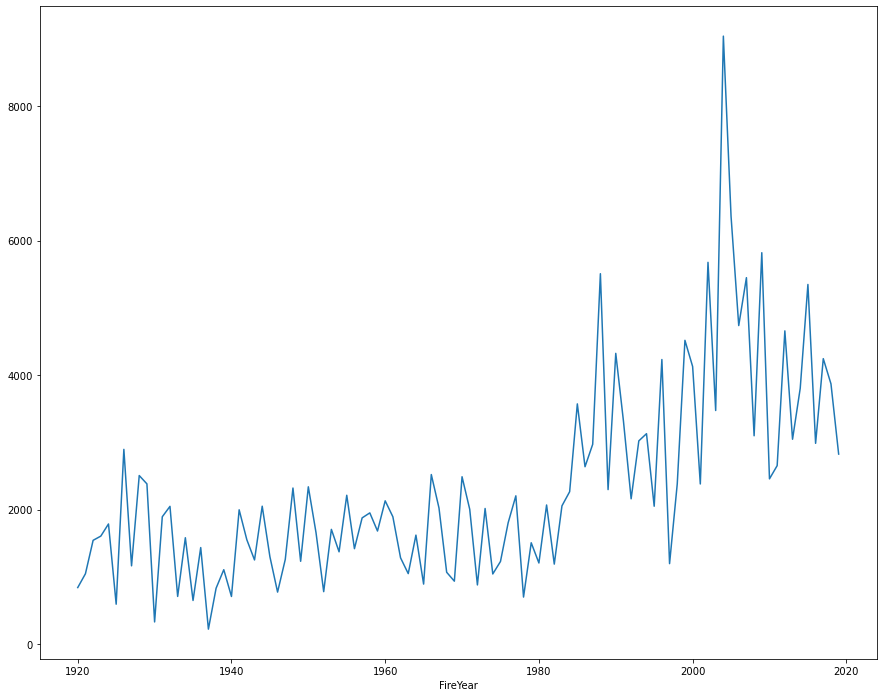

In [18]:
# Average fire size each year, over the past century

acYearMean = centFire.groupby('FireYear').Acres.mean()

acYearMean.plot();

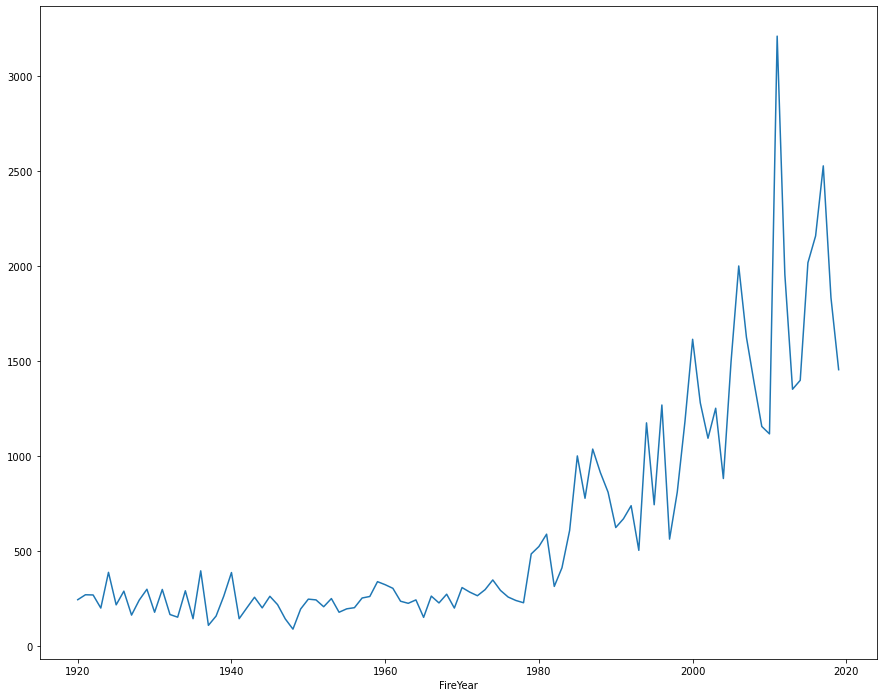

In [19]:
# Number of wildfires per year over the past century

fireCount = centFire.groupby('FireYear').count()

fireCount.FireName.plot();

In [20]:
# Create variables for each decade

fires20s = centFire[(centFire.FireYear <= 1929)]

fires30s = centFire[(centFire.FireYear >= 1930) & (centFire.FireYear <= 1939)]

fires40s = centFire[(centFire.FireYear >= 1940) & (centFire.FireYear <= 1949)]

fires50s = centFire[(centFire.FireYear >= 1950) & (centFire.FireYear <= 1959)]

fires60s = centFire[(centFire.FireYear >= 1960) & (centFire.FireYear <= 1969)]

fires70s = centFire[(centFire.FireYear >= 1970) & (centFire.FireYear <= 1979)]

fires80s = centFire[(centFire.FireYear >= 1980) & (centFire.FireYear <= 1989)]

fires90s = centFire[(centFire.FireYear >= 1990) & (centFire.FireYear <= 1999)]

fires2k = centFire[(centFire.FireYear >= 2000) & (centFire.FireYear <= 2009)]

fires2k10 = centFire[(centFire.FireYear >= 2010)]


In [21]:
# Create variables for acreage of fires each decade

acres20s = fires20s.Acres

acres30s = fires30s.Acres

acres40s = fires40s.Acres

acres50s = fires50s.Acres

acres60s = fires60s.Acres

acres70s = fires70s.Acres

acres80s = fires80s.Acres

acres90s = fires90s.Acres

acres2k = fires2k.Acres

acres2k10 = fires2k10.Acres

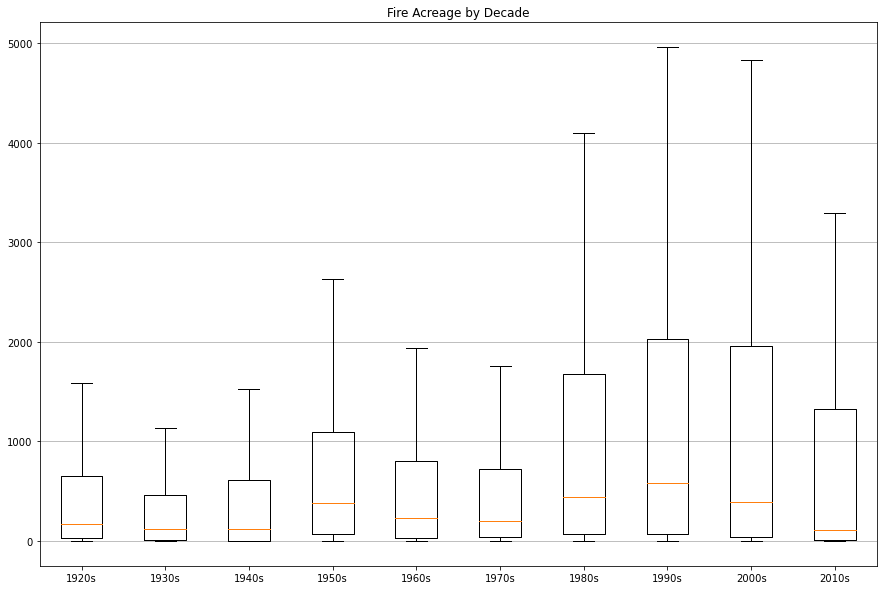

In [180]:
# all data to be plotted
data = [acres20s, acres30s, acres40s, acres50s, acres60s, acres70s, acres80s, acres90s, acres2k, acres2k10]

# create labels 
labels = ['1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Fire Acreage by Decade')
ax.boxplot(data, showfliers=False);
# ax.set_yticklabels(labels)
# ax.xaxis.grid(True)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)

## Create GeoJSONs of Fire Data Subsets for Web Mapping

Creating GeoJSONs of the individual decade subsets

In [26]:
fires20s.to_file('../rawData/fire20s.geojson', driver="GeoJSON")

In [27]:
fires30s.to_file('../rawData/fire30s.geojson', driver="GeoJSON")

In [28]:
fires40s.to_file('../rawData/fire40s.geojson', driver="GeoJSON")

In [29]:
fires50s.to_file('../rawData/fire50s.geojson', driver="GeoJSON")

In [30]:
fires60s.to_file('../rawData/fire60s.geojson', driver="GeoJSON")

In [31]:
fires70s.to_file('../rawData/fire70s.geojson', driver="GeoJSON")

In [32]:
fires80s.to_file('../rawData/fire80s.geojson', driver="GeoJSON")

In [33]:
fires90s.to_file('../rawData/fire90s.geojson', driver="GeoJSON")

In [34]:
fires2k.to_file('../rawData/fire2k.geojson', driver="GeoJSON")

In [35]:
fires2k10.to_file('../rawData/fire2k10.geojson', driver="GeoJSON")

## Data Subset with Ignition and Control Dates



In [125]:
centFire.notnull().sum()

FireName      62744
FireYear      62744
IgntDate      34077
ContrlDate    22878
ContnDate      7196
Acres         62744
Hectares      62744
FireCause     62744
FireQual      62744
Shape_Leng    62744
Shape_Area    62744
geometry      62744
dtype: int64

In [129]:
# Check for records with Ignition and Control Dates

bothDates = centFire[(centFire.IgntDate.notnull()) & (centFire.ContrlDate.notnull())]

bothDates

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,FireQual,Shape_Leng,Shape_Area,geometry
3111,BULLDOG,1993,1993-08-01,1993-08-04,None,1151.845182,466.135619,Unknown,1,14868.036527,4.661356e+06,"POLYGON ((-113.86058 37.02242, -113.85956 37.0..."
3176,MILL CREEK,1993,1993-06-21,1993-06-23,None,3456.959077,1398.982941,Natural,1,23951.896471,1.398983e+07,"POLYGON ((-113.53524 37.22023, -113.53478 37.2..."
3317,WHITE ROCK,1993,1993-07-15,1993-07-19,None,3104.880685,1256.501745,Human,1,22563.222161,1.256502e+07,"POLYGON ((-114.02168 38.18800, -114.02107 38.1..."
3372,BULLOCH,1994,1994-07-22,1994-07-25,None,1702.961502,689.164679,Natural,1,16963.187545,6.891647e+06,"POLYGON ((-112.89457 37.40672, -112.89397 37.4..."
3382,CAVE CANYON,1994,1994-07-27,1994-08-15,None,1197.874480,484.763032,Natural,1,13209.277725,4.847630e+06,"POLYGON ((-112.88627 38.32879, -112.88582 38.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...
62332,Workhorse,2019,2019-07-06,2019-07-07,None,154.294363,62.440769,Natural,2,6635.436744,6.244077e+05,"POLYGON ((-116.75791 40.88787, -116.75793 40.8..."
62333,Worm Lake,2019,2019-07-20,2019-10-15,None,27.173260,10.996638,Natural,2,1959.268784,1.099664e+05,"POLYGON ((-152.59138 64.79264, -152.59136 64.7..."
62334,Wylies,2019,2019-08-05,2019-08-05,None,0.087160,0.035272,Unknown,2,69.927927,3.527239e+02,"POLYGON ((-114.92200 46.00751, -114.92204 46.0..."
62335,Yale,2019,2019-08-20,2019-08-20,None,3.426372,1.386605,Unknown,2,643.951177,1.386605e+04,"POLYGON ((-113.44581 42.74512, -113.44581 42.7..."


In [131]:
# 62,744 entries in the centFire df, only 10,948 when filtered for records with both Ignition and Control Dates

bothDates.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10948 entries, 3111 to 62338
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FireName    10948 non-null  object  
 1   FireYear    10948 non-null  int64   
 2   IgntDate    10948 non-null  object  
 3   ContrlDate  10948 non-null  object  
 4   ContnDate   789 non-null    object  
 5   Acres       10948 non-null  float64 
 6   Hectares    10948 non-null  float64 
 7   FireCause   10948 non-null  object  
 8   FireQual    10948 non-null  int64   
 9   Shape_Leng  10948 non-null  float64 
 10  Shape_Area  10948 non-null  float64 
 11  geometry    10948 non-null  geometry
dtypes: float64(4), geometry(1), int64(2), object(5)
memory usage: 1.1+ MB


In [132]:
bothDates.to_file('../rawData/bothIgCtrlDates.geojson', driver="GeoJSON")

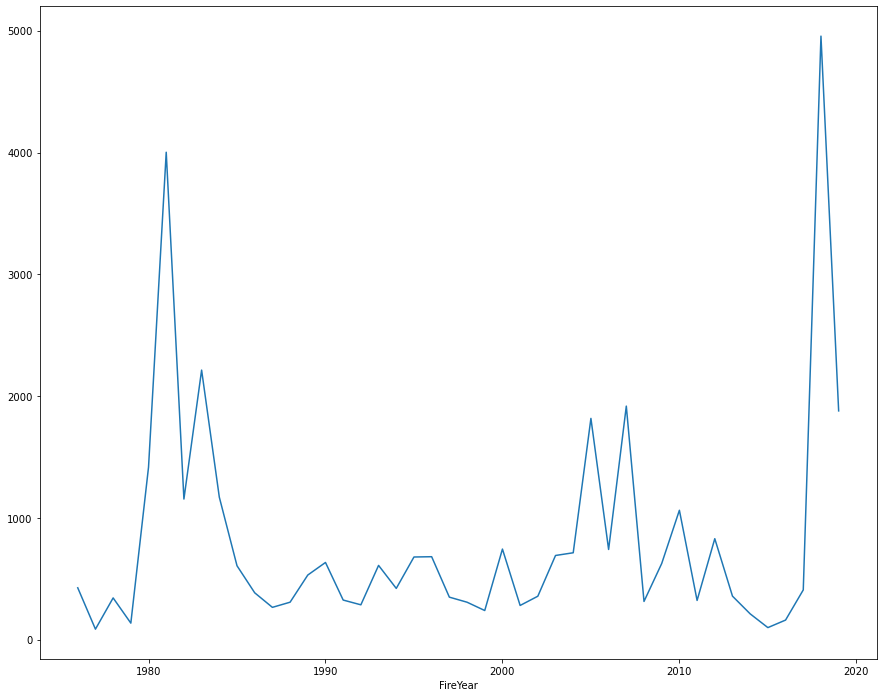

In [133]:
centBothDates = bothDates.groupby('FireYear').Acres.mean()

centBothDates.plot();

In [149]:
hasBoth = hasIgntDate[(hasIgntDate['ContrlDate'].notnull())]

In [150]:
hasBoth

,FireName,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,FireCause,FireQual,Shape_Leng,Shape_Area,geometry
3111,BULLDOG,1993,1993-08-01,1993-08-04,None,1151.845182,466.135619,Unknown,1,14868.036527,4.661356e+06,"POLYGON ((-113.86058 37.02242, -113.85956 37.0..."
3176,MILL CREEK,1993,1993-06-21,1993-06-23,None,3456.959077,1398.982941,Natural,1,23951.896471,1.398983e+07,"POLYGON ((-113.53524 37.22023, -113.53478 37.2..."
3317,WHITE ROCK,1993,1993-07-15,1993-07-19,None,3104.880685,1256.501745,Human,1,22563.222161,1.256502e+07,"POLYGON ((-114.02168 38.18800, -114.02107 38.1..."
3372,BULLOCH,1994,1994-07-22,1994-07-25,None,1702.961502,689.164679,Natural,1,16963.187545,6.891647e+06,"POLYGON ((-112.89457 37.40672, -112.89397 37.4..."
3382,CAVE CANYON,1994,1994-07-27,1994-08-15,None,1197.874480,484.763032,Natural,1,13209.277725,4.847630e+06,"POLYGON ((-112.88627 38.32879, -112.88582 38.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...
62332,Workhorse,2019,2019-07-06,2019-07-07,None,154.294363,62.440769,Natural,2,6635.436744,6.244077e+05,"POLYGON ((-116.75791 40.88787, -116.75793 40.8..."
62333,Worm Lake,2019,2019-07-20,2019-10-15,None,27.173260,10.996638,Natural,2,1959.268784,1.099664e+05,"POLYGON ((-152.59138 64.79264, -152.59136 64.7..."
62334,Wylies,2019,2019-08-05,2019-08-05,None,0.087160,0.035272,Unknown,2,69.927927,3.527239e+02,"POLYGON ((-114.92200 46.00751, -114.92204 46.0..."
62335,Yale,2019,2019-08-20,2019-08-20,None,3.426372,1.386605,Unknown,2,643.951177,1.386605e+04,"POLYGON ((-113.44581 42.74512, -113.44581 42.7..."


In [151]:
hasBoth.FireYear.max()

2019

In [152]:
hasBoth.FireYear.min()

1976

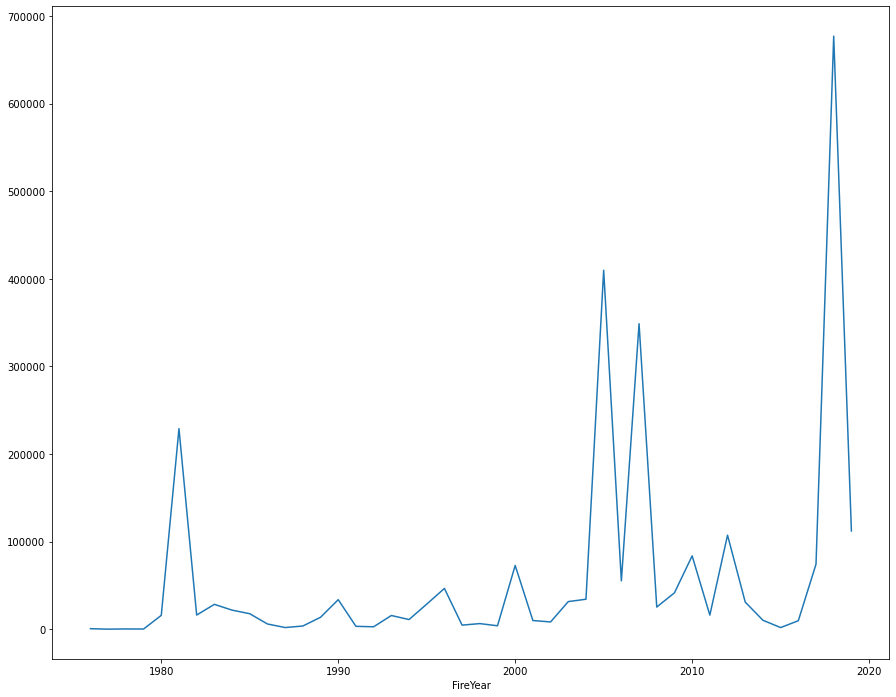

In [153]:
hasBoth.groupby('FireYear').Acres.max().plot();

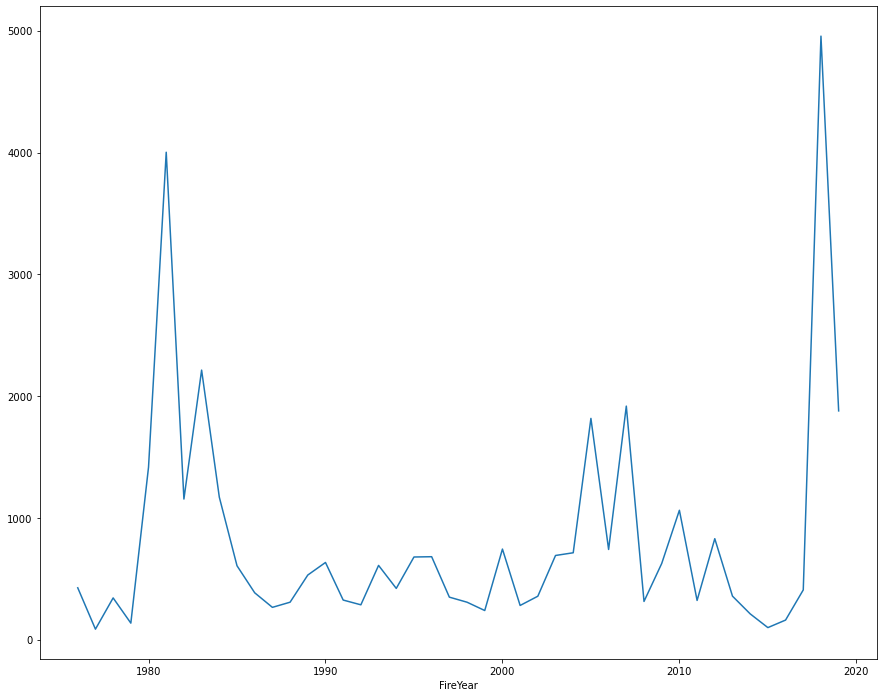

In [154]:
hasBoth.groupby('FireYear').Acres.mean().plot();

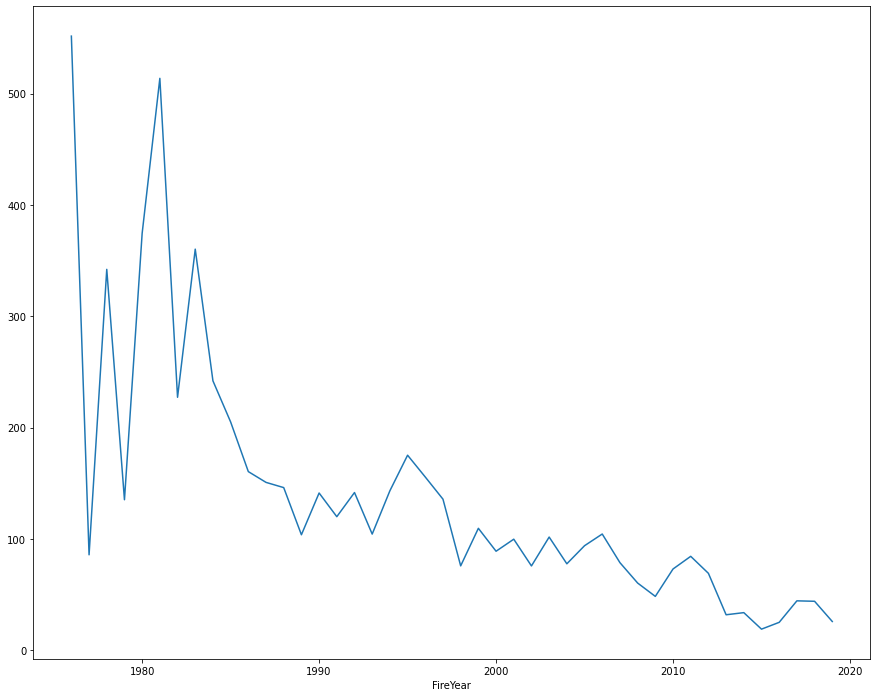

In [157]:
hasBoth.groupby('FireYear').Acres.median().plot();